In [1994]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use( 'ggplot' ) 

from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

from IPython.display import display
import warnings
warnings.filterwarnings( 'ignore' )

In [1995]:
df = pd.read_csv('mortality.csv')
 
# Drop rows with missing target value
df = df[df['outcome'].notna()]
# Drop ID and Group
df = df.drop(columns=['ID', 'group'])
df

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,NaN,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,62,1,25.516870,1,1,0,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,0.0,78,1,25.822710,0,1,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,0.0,85,2,23.891779,1,1,0,1,1,0,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,0.0,79,2,35.288554,0,0,1,1,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [1996]:
display( df.describe() )

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1176.000000,1176.000000,1176.000000,962.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1175.000000,1176.000000,1176.000000,1176.000000,885.000000,1176.000000,948.000000,883.000000,1176.000000
mean,0.135204,74.047619,1.525510,30.188278,0.717687,0.451531,0.085884,0.420918,0.339286,0.119048,...,138.897009,8.501789,102.292048,13.923755,2.120286,7.378532,26.912116,1.853426,45.535382,48.710034
std,0.342087,13.437241,0.499561,9.325997,0.450316,0.497857,0.280312,0.493917,0.473668,0.323982,...,4.146172,0.571683,5.334562,2.653463,0.251608,0.067320,5.169696,0.983819,12.711271,12.872604
min,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.150000,99.000000,12.250000,1.955556,7.334615,23.452020,1.200000,37.038462,40.000000
50%,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.516667,13.666667,2.092582,7.380000,26.500000,1.600000,43.000000,55.000000
75%,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,141.600000,8.869375,105.571429,15.404167,2.241964,7.430000,29.881250,2.200000,50.585784,55.000000
max,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [1997]:
# Mortality rate
print('0-Alive  1-Death')

def Mortality_Count(Data):
    mortality = df['outcome'].value_counts(normalize=True)*100
    Mortality_rate = pd.DataFrame( { 'Percentage(%)':mortality.values } )
    return  Mortality_rate
display( Mortality_Count(df) )

0-Alive  1-Death


,Percentage(%)
0,86.479592
1,13.520408


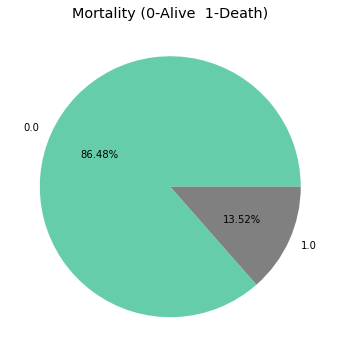

In [1998]:
plt.figure( figsize=(6,6) )
df['outcome'].value_counts().plot( kind='pie', colors=['mediumaquamarine','gray'], autopct='%1.2f%%' )
plt.title( 'Mortality (0-Alive  1-Death)' )
plt.ylabel( '' )
plt.savefig('mortality_rate_1')
plt.show()

In [1999]:
# Resampling - Random under-sampling

# Class count
count_class_0, count_class_1 = df.outcome.value_counts()

# Divide by class
df_class_0 = df[df['outcome'] == 0]
df_class_1 = df[df['outcome'] == 1]

df_class_0_under = df_class_0.sample(200)
df = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df.outcome.value_counts())



Random under-sampling:
0.0    200
1.0    159
Name: outcome, dtype: int64


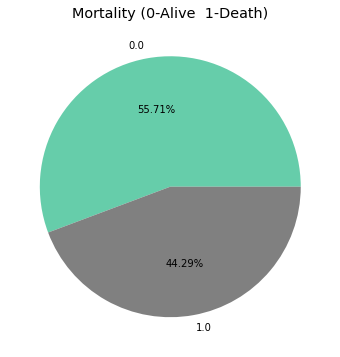

In [2000]:
plt.figure( figsize=(6,6) )
df['outcome'].value_counts().plot( kind='pie', colors=['mediumaquamarine','gray'], autopct='%1.2f%%' )
plt.title( 'Mortality (0-Alive  1-Death)' )
plt.ylabel( '' )
plt.savefig('mortality_rate_2')
plt.show()

In [2001]:
# Age -> Age Group
bins= [0,10,50,70,100]
labels = ['0-10','11-50','51-70','71-100']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df = df.drop(columns=['age'])
df

,outcome,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,AgeGroup
569,0.0,2,33.981932,0,0,0,1,0,1,1,...,9.445455,91.000000,15.916667,2.457143,7.436667,29.166667,2.600000,38.333333,45,51-70
330,0.0,2,21.058030,0,1,0,0,1,1,0,...,8.450000,96.833333,13.666667,1.750000,NaN,24.500000,1.600000,NaN,55,71-100
389,0.0,1,42.646946,1,0,0,1,0,0,0,...,8.446667,99.411765,13.470588,1.740000,7.355238,30.294118,1.716667,57.842105,55,11-50
695,0.0,1,26.435986,1,0,0,0,1,0,0,...,8.566667,108.571429,12.714286,1.950000,NaN,24.714286,NaN,45.540000,45,71-100
797,0.0,2,31.048449,1,0,0,1,1,0,0,...,9.730000,97.100000,18.500000,2.077778,NaN,28.600000,NaN,NaN,40,51-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1.0,2,19.682579,0,0,0,0,0,0,0,...,8.200000,103.666667,22.500000,2.200000,7.090000,17.000000,6.500000,54.000000,30,11-50
1145,1.0,1,32.582245,1,1,0,1,0,0,0,...,8.387500,102.090909,20.000000,2.555556,NaN,23.454545,NaN,NaN,55,71-100
1147,1.0,2,18.996620,0,0,0,0,0,0,0,...,8.666667,94.444444,8.750000,2.371429,7.370000,38.500000,NaN,69.000000,55,51-70
1164,1.0,1,26.197235,0,1,0,0,0,0,0,...,8.700000,109.538461,12.923077,2.276923,7.240000,24.769231,NaN,62.000000,55,71-100


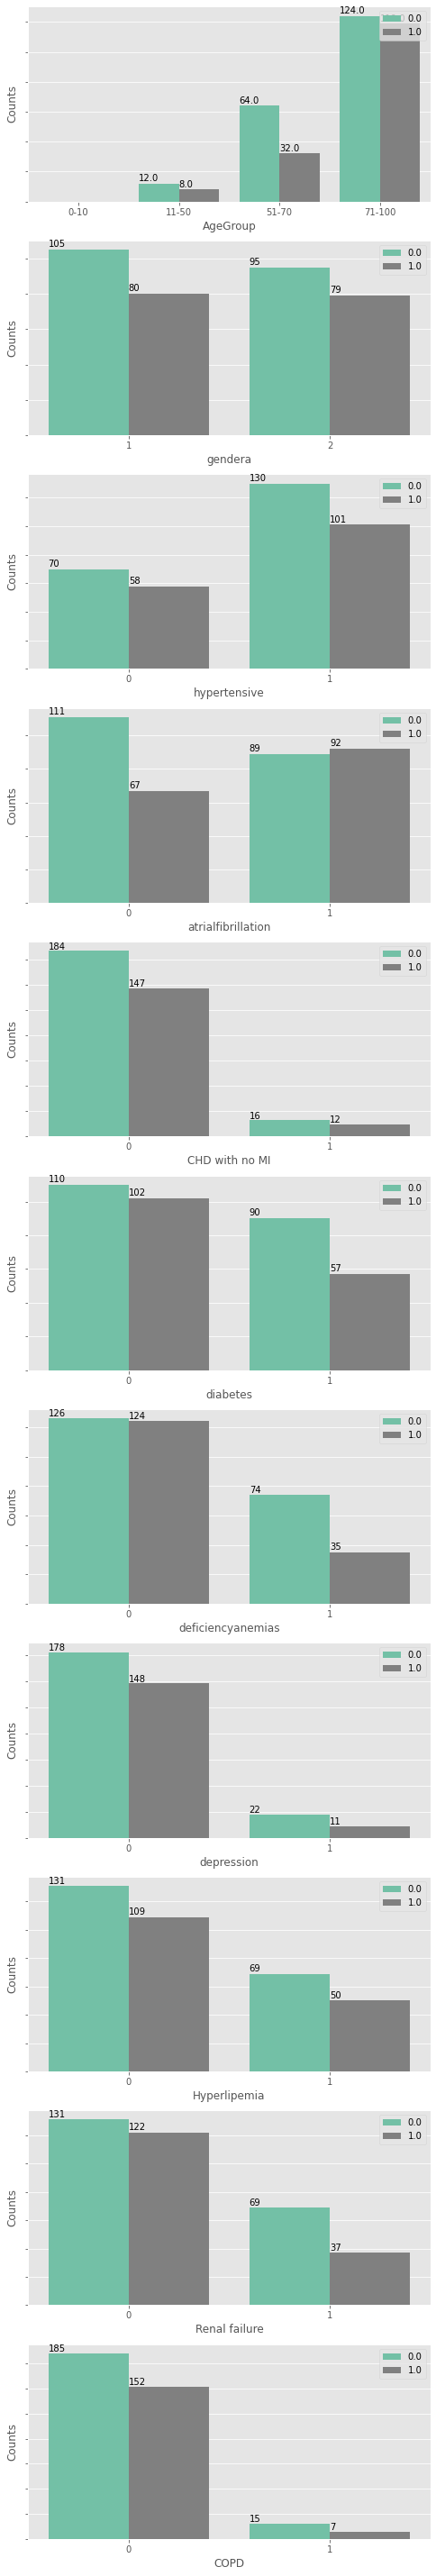

In [2002]:
selected_cols = ['AgeGroup','gendera','hypertensive','atrialfibrillation','CHD with no MI','diabetes'
                 ,'deficiencyanemias','depression','Hyperlipemia','Renal failure','COPD']

plt.figure( figsize=(8,len(selected_cols)*4.7) )
gs = gridspec.GridSpec(len(selected_cols),1)    
for i, col in enumerate( df[selected_cols] ) :        
    ax = plt.subplot( gs[i] )
    sns.countplot( df[col], hue=df.outcome, palette=['mediumaquamarine','gray'] )
    ax.set_yticklabels([])
    ax.set_ylabel( 'Counts' )
    ax.legend( loc=1 )   # upper right:1 ; upper left:2
    for p in ax.patches:
        ax.annotate( '{:,}'.format(p.get_height()), (p.get_x(), p.get_height()+1.5) )
plt.show()

In [2003]:
for col in selected_cols:
    l = ['outcome']
    l.append(col) 
    Mortality = df[l].groupby(by=col).mean().round(4).reset_index()
    Mortality.columns = [col,'Death(%)']
    Mortality['Death(%)'] = Mortality['Death(%)'].map( lambda x:x*100 )
    display(Mortality)    

,AgeGroup,Death(%)
0,0-10,NaN
1,11-50,40.00
2,51-70,33.33
3,71-100,48.97


,gendera,Death(%)
0,1,43.24
1,2,45.40


,hypertensive,Death(%)
0,0,45.31
1,1,43.72


,atrialfibrillation,Death(%)
0,0,37.64
1,1,50.83


,CHD with no MI,Death(%)
0,0,44.41
1,1,42.86


,diabetes,Death(%)
0,0,48.11
1,1,38.78


,deficiencyanemias,Death(%)
0,0,49.60
1,1,32.11


,depression,Death(%)
0,0,45.40
1,1,33.33


,Hyperlipemia,Death(%)
0,0,45.42
1,1,42.02


,Renal failure,Death(%)
0,0,48.22
1,1,34.91


,COPD,Death(%)
0,0,45.10
1,1,31.82


In [2004]:
# Coorelation to mortality
Corr_Matrix = df.corr()
Corr = Corr_Matrix.loc['outcome',:].sort_values()[:-1]
Corr = pd.DataFrame({ 'outcome':Corr })
Corr

,outcome
Urine output,-0.299721
Bicarbonate,-0.265156
Blood calcium,-0.221037
Lymphocyte,-0.197210
Systolic blood pressure,-0.184628
PH,-0.169916
deficiencyanemias,-0.161904
Diastolic blood pressure,-0.137250
Renal failure,-0.122282
temperature,-0.113912


<AxesSubplot:>

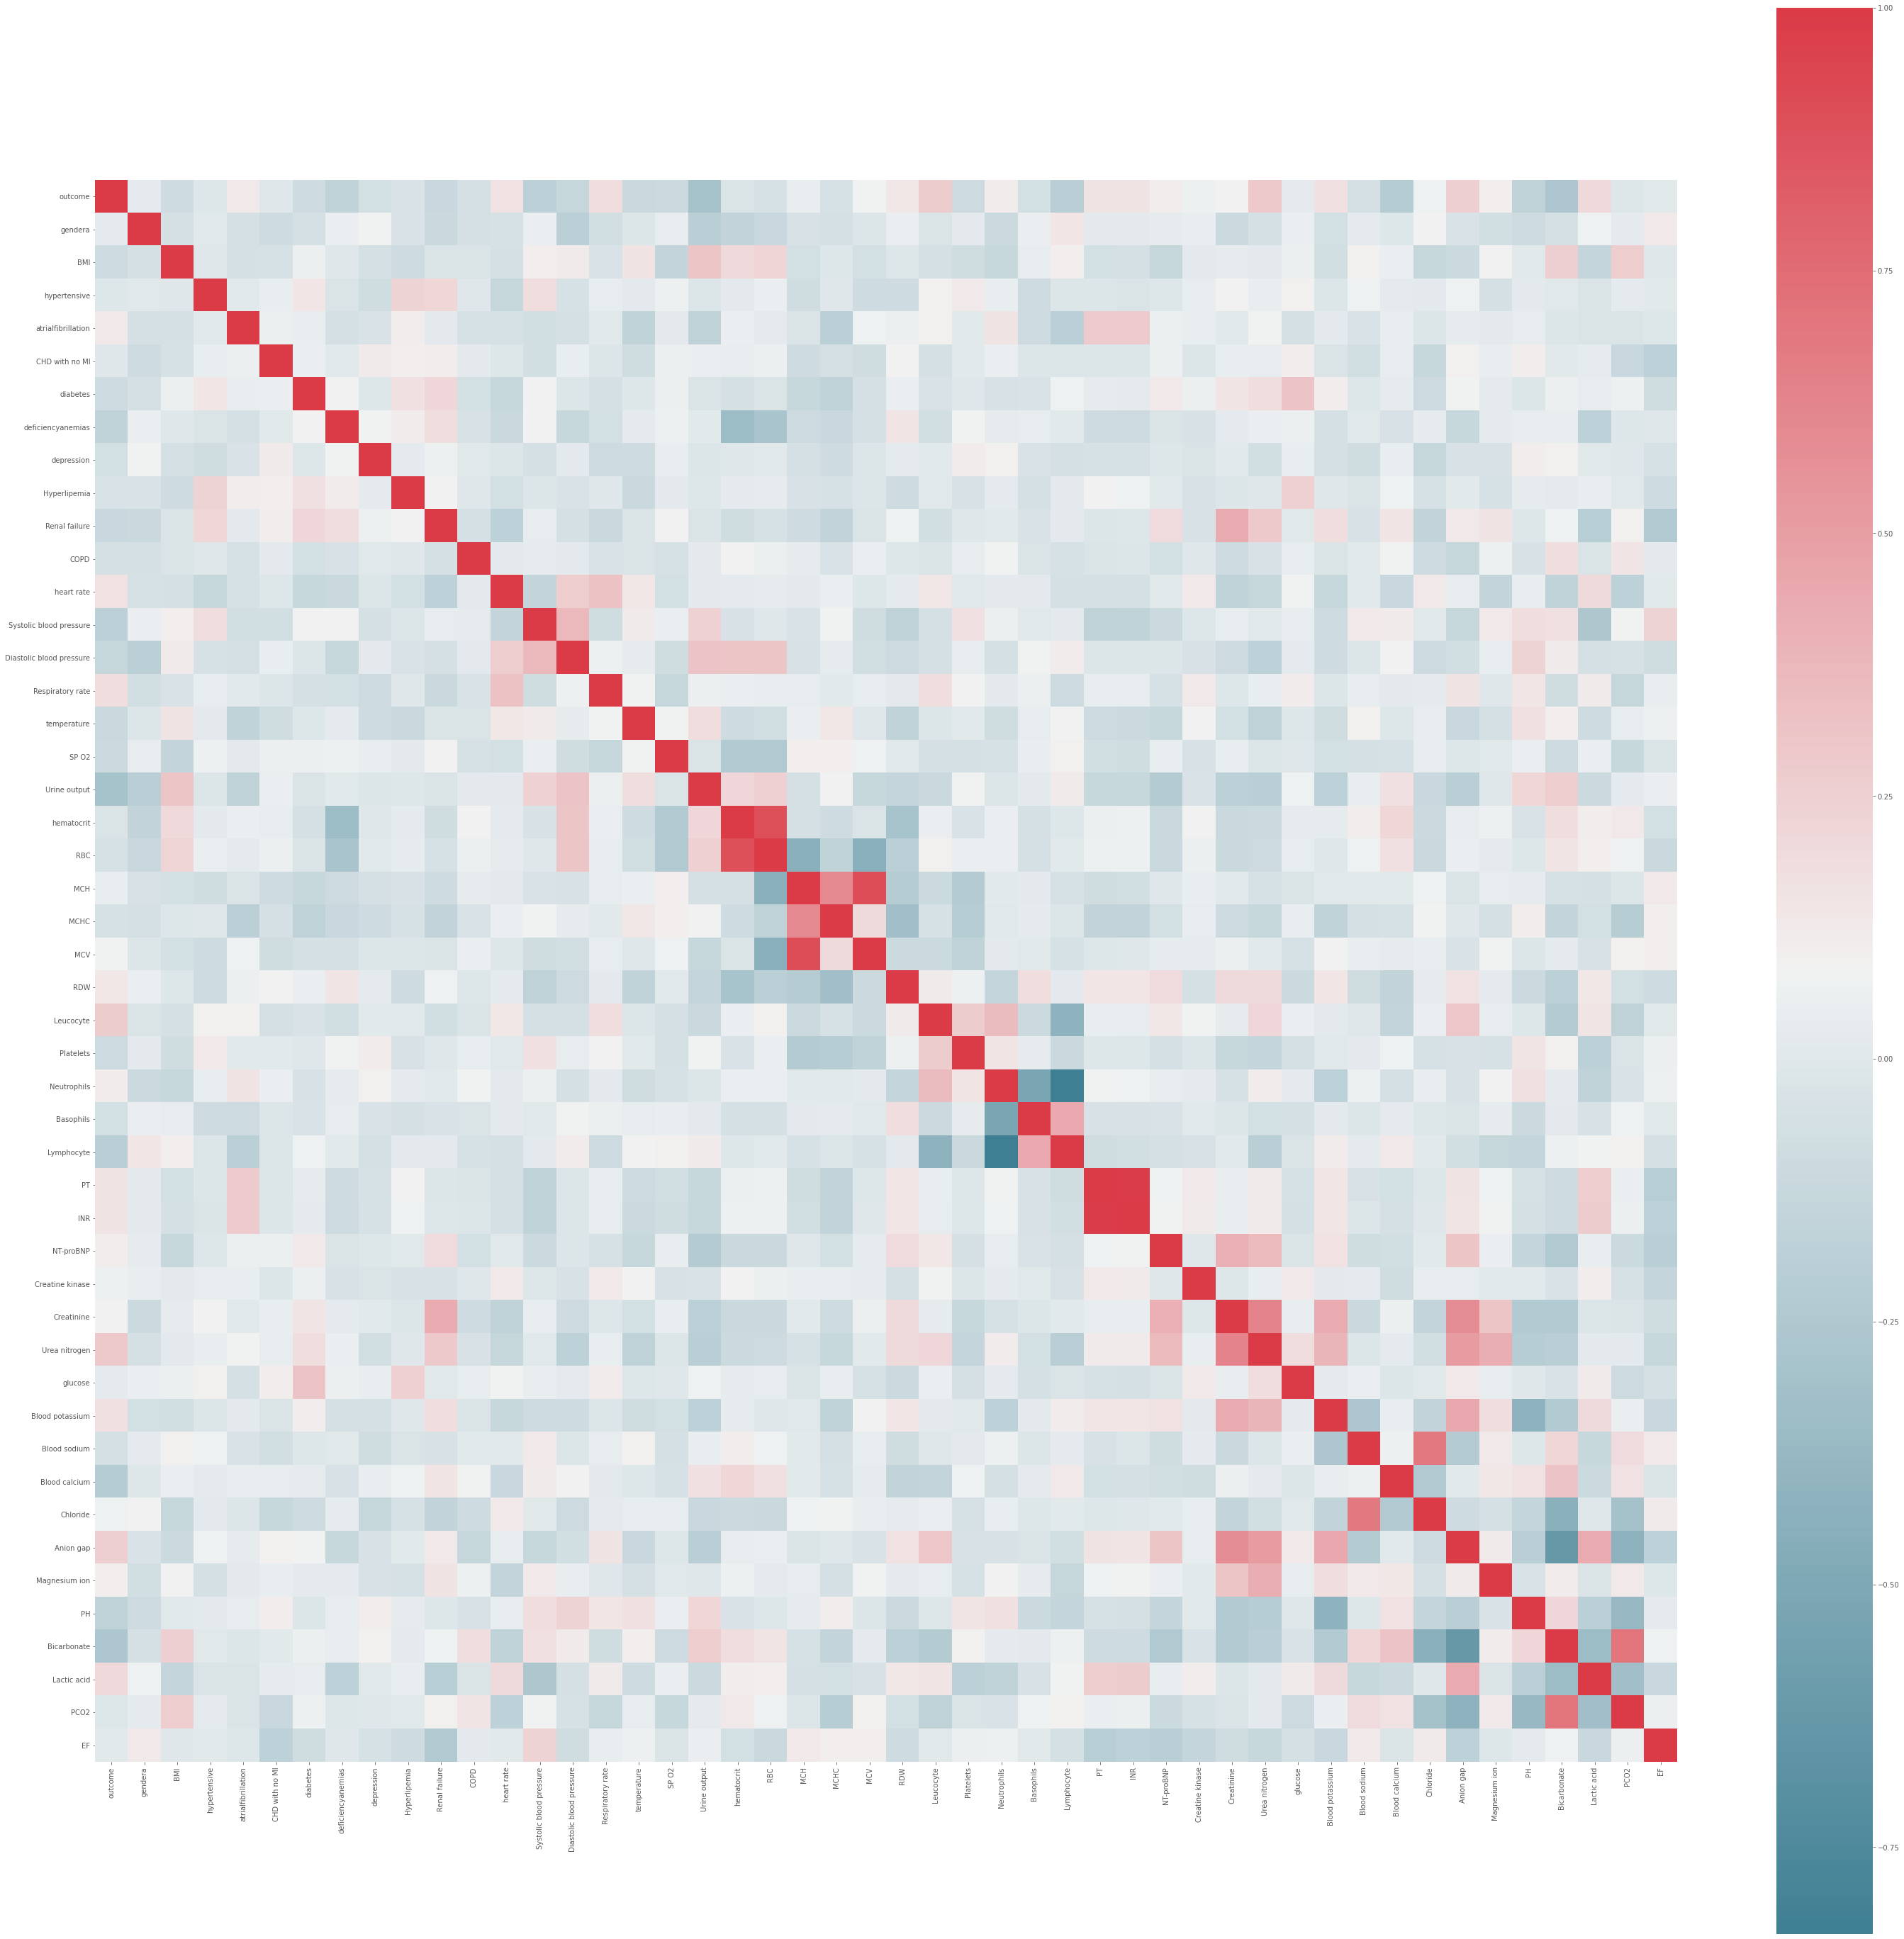

In [2005]:
f, ax = plt.subplots(figsize=(50, 50))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [2006]:
Corr_Matrix2 = df.corr()
Corr2 = Corr_Matrix2.loc['MCH',:].sort_values()[:-1]
Corr2 = pd.DataFrame({ 'MCH':Corr2 })
Corr2

,MCH
RBC,-0.439433
Platelets,-0.224177
RDW,-0.219533
diabetes,-0.124006
Leucocyte,-0.108063
deficiencyanemias,-0.099318
CHD with no MI,-0.091832
Renal failure,-0.091384
PT,-0.082159
hypertensive,-0.081851


In [2007]:
# count missing values
def Missing_Counts(Data): 
    missing = Data.isnull().sum()
    missing = missing[ missing>0 ]
    missing.sort_values( inplace=True ) 
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/Data.shape[0]*100,2) )
    return  Missing_Count

print( 'Missing value:' )
display( Missing_Counts(df) )

Missing value:


,ColumnName,MissingCount,Percentage(%)
0,Blood calcium,1,0.28
1,glucose,3,0.84
2,heart rate,4,1.11
3,Respiratory rate,4,1.11
4,SP O2,4,1.11
5,Systolic blood pressure,5,1.39
6,Diastolic blood pressure,5,1.39
7,PT,5,1.39
8,INR,5,1.39
9,temperature,7,1.95


In [2008]:
# Dealing with missing values
cols = ['Blood calcium', 'heart rate','Respiratory rate','SP O2','Systolic blood pressure','Diastolic blood pressure'
       ,'glucose','temperature','PT','INR','Urine output','Neutrophils','Lymphocyte','Creatine kinase','BMI','Lactic acid'
       ,'PH','PCO2','Basophils']
df[cols]=df[cols].fillna(df.median().iloc[0])


In [2009]:
# OneHot Encoding
OneHot_Age= pd.get_dummies(df.AgeGroup, prefix='AgeGroup')
OneHot_Age.drop(['AgeGroup_0-10','AgeGroup_11-50'], axis=1, inplace=True)
df = pd.concat([df, OneHot_Age], axis=1 )
df.drop( 'AgeGroup', axis=1, inplace=True )

In [2010]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data.sort_values(by=['VIF']))

                     feature            VIF
33           Creatine kinase       1.176956
11                      COPD       1.195748
8                 depression       1.293595
5             CHD with no MI       1.315047
9               Hyperlipemia       1.914339
28                 Basophils       1.931166
7          deficiencyanemias       1.963637
6                   diabetes       2.400918
10             Renal failure       2.402328
32                 NT-proBNP       2.590480
4         atrialfibrillation       2.733766
0                    outcome       2.971979
29                Lymphocyte       3.956222
3               hypertensive       4.077733
18              Urine output       4.306694
2                        BMI       4.561774
45               Lactic acid       5.671208
26                 Platelets       7.442172
48            AgeGroup_51-70       7.561094
25                 Leucocyte       8.331068
27               Neutrophils       9.796621
35             Urea nitrogen    

In [2011]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
df2 = df.drop(columns=['Blood sodium','MCH','MCV','temperature','MCHC','PT','Blood calcium','Chloride','hematocrit'
                      ,'SP O2','Blood potassium','Magnesium ion','Systolic blood pressure','Anion gap','RDW',
                      'heart rate','RBC','Diastolic blood pressure','Bicarbonate','Respiratory rate','EF',
                       'glucose','PH','Basophils','gendera','Creatinine'])

vif_data["feature"] = df2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df2.values, i)
                          for i in range(len(df2.columns))]
  
print(vif_data.sort_values(by=['VIF']))

               feature        VIF
18     Creatine kinase   1.055177
10                COPD   1.108104
4       CHD with no MI   1.181184
7           depression   1.198967
6    deficiencyanemias   1.593229
8         Hyperlipemia   1.747996
9        Renal failure   1.928541
5             diabetes   1.982453
17           NT-proBNP   2.191333
15          Lymphocyte   2.461588
3   atrialfibrillation   2.479177
0              outcome   2.634587
11        Urine output   2.996028
20         Lactic acid   3.367063
2         hypertensive   3.614430
1                  BMI   3.831896
21                PCO2   4.186574
16                 INR   4.291847
22      AgeGroup_51-70   4.562867
13           Platelets   5.500245
19       Urea nitrogen   5.522548
12           Leucocyte   7.374843
14         Neutrophils   8.224169
23     AgeGroup_71-100  10.274120


In [2012]:
# Drop highly-correlated features
df = df.drop(columns=['Blood sodium','MCH','MCV','temperature','MCHC','PT','Blood calcium','Chloride','hematocrit'
                      ,'SP O2','Blood potassium','Magnesium ion','Systolic blood pressure','Anion gap','RDW',
                      'heart rate','RBC','Diastolic blood pressure','Bicarbonate','Respiratory rate','EF',
                      'glucose','gendera'])

<AxesSubplot:>

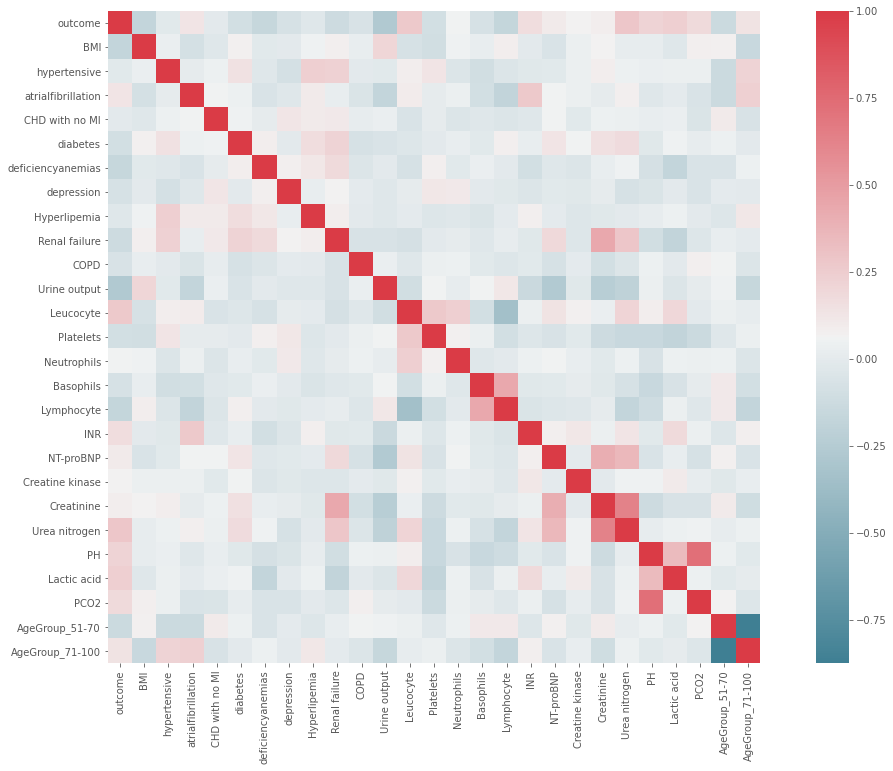

In [2013]:
f, ax = plt.subplots(figsize=(20, 12))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [2014]:
# standardize
scaler = preprocessing.MinMaxScaler()
df_scale = scaler.fit_transform(df.iloc[:,:])
df = pd.DataFrame(df_scale, columns = df.iloc[:,:].columns)

In [2021]:
# split into training and test sets
train, test = train_test_split(df, test_size=0.3, random_state=100)

train_target = train['outcome']
test_target = test['outcome']
train.drop( 'outcome', axis=1, inplace=True )
test.drop( 'outcome', axis=1, inplace=True )

In [2022]:
# Logistic Regression - l1 regularization
clf_1 = LogisticRegression(penalty='l1',solver='liblinear').fit(train, train_target)
train_1 = clf_1.predict(train)
pred_1= clf_1.predict(test)
print('train set accuracy score:', clf_1.score(train, train_target))
print('test set accuracy score:',  clf_1.score(test, test_target))
"""
print('train set r2 score:', r2_score(train_1, train_target))
print('test set r2 score:', r2_score(pred_1, test_target))
"""

train set accuracy score: 0.8007968127490039
test set accuracy score: 0.7222222222222222


"\nprint('train set r2 score:', r2_score(train_1, train_target))\nprint('test set r2 score:', r2_score(pred_1, test_target))\n"

In [2023]:
# Logistic Regression - l2 regularization
clf_2 = LogisticRegression(penalty='l2').fit(train, train_target)
train_2 = clf_2.predict(train)
pred_2= clf_2.predict(test)
print('train set accuracy score:', clf_2.score(train, train_target))
print('test set accuracy score:',  clf_2.score(test, test_target))
"""
print('train set r2 score:', r2_score(train_2, train_target))
print('test set r2 score:', r2_score(pred_2, test_target))
"""

train set accuracy score: 0.796812749003984
test set accuracy score: 0.7129629629629629


"\nprint('train set r2 score:', r2_score(train_2, train_target))\nprint('test set r2 score:', r2_score(pred_2, test_target))\n"

In [2024]:
# Decision Tree
clf_tree = tree.DecisionTreeClassifier().fit(train, train_target)
train_3= clf_tree.predict(train)
pred_3= clf_tree.predict(test)
print('train set accuracy score:', clf_tree.score(train, train_target))
print('test set accuracy score:',  clf_tree.score(test, test_target))
"""
print('train set r2 score:', r2_score(train_3, train_target))
print('test set r2 score:', r2_score(pred_3, test_target))
"""

train set accuracy score: 1.0
test set accuracy score: 0.6481481481481481


"\nprint('train set r2 score:', r2_score(train_3, train_target))\nprint('test set r2 score:', r2_score(pred_3, test_target))\n"

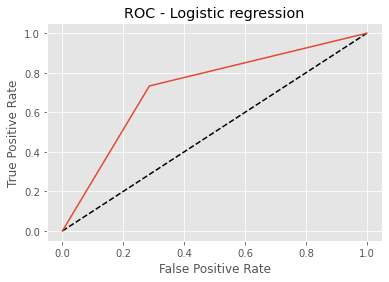

AUC =  0.7238095238095238


In [2025]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve, auc, roc_auc_score

pred= clf_1.predict(test)
fpr, tpr, thresholds = roc_curve(test_target, pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic regression')
plt.show()

# auc scores
auc_score = roc_auc_score(test_target, pred)
print('AUC = ', auc_score)


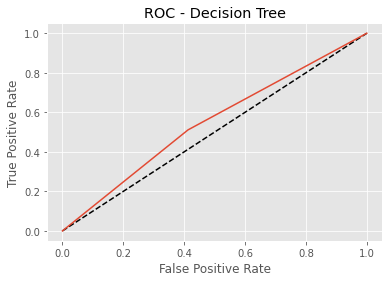

AUC =  0.5492063492063493


In [2020]:
# ROC Curve with Decision Tree
pred= clf_tree.predict(test)
fpr, tpr, thresholds = roc_curve(test_target, pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.show()

# auc scores
auc_score = roc_auc_score(test_target, pred)
print('AUC = ', auc_score)

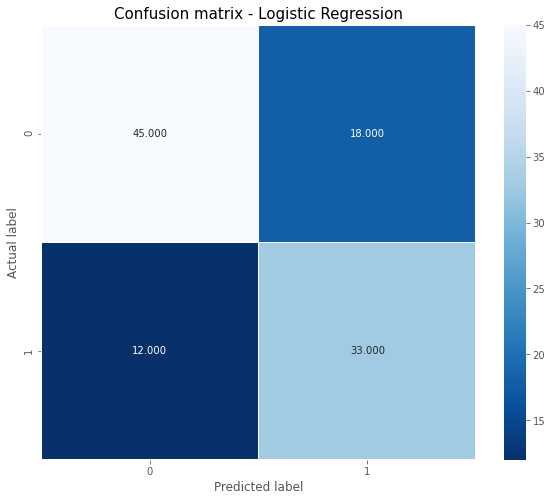

In [2033]:
from sklearn import metrics

pred= clf_1.predict(test)

cm = metrics.confusion_matrix(test_target, pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion matrix - Logistic Regression'
plt.title(all_sample_title, size = 15);


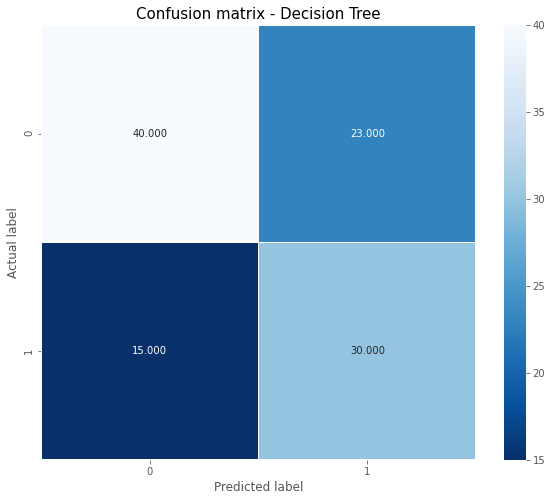

In [2035]:
pred= clf_tree.predict(test)

cm = metrics.confusion_matrix(test_target, pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion matrix - Decision Tree'
plt.title(all_sample_title, size = 15);

In [2037]:
import statsmodels.api as sm
logit_model=sm.Logit(train_target,train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.434005
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                  251
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                           25
Date:                Thu, 28 Oct 2021   Pseudo R-squ.:                  0.3700
Time:                        18:44:54   Log-Likelihood:                -108.94
converged:                       True   LL-Null:                       -172.92
Covariance Type:            nonrobust   LLR p-value:                 8.474e-16
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
BMI                   -2.7947      1.286     -2.173      0.030      -5.316      -0.274
hyper